<a href="https://colab.research.google.com/github/josephcabezas/JPMorgan-Chase-Bank-Churn/blob/main/python/bank_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split,cross_val_score
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor # çok değişkenli aykırı gözlem incelemesi
from sklearn.preprocessing import scale,StandardScaler, MinMaxScaler,Normalizer,RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);  # to display all columns and rows
pd.set_option('display.float_format', lambda x: '%.2f' % x) # The number of numbers that will be shown after the comma.

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/churn-for-bank-customers")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/churn-for-bank-customers/versions/1


In [ ]:
import os
csv_file = os.path.join(path, 'churn.csv')
df = pd.read_csv(csv_file)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# making a copy
df_original = df
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# manipulating data to better ressemble jp morgan
df['Geography'] = df['Geography'].replace({'France': 'USA', 'Spain': 'UK', 'Germany': 'Canada'})
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,USA,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,UK,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,USA,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,USA,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,UK,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = df.drop('RowNumber', axis=1)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,USA,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,UK,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,USA,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,USA,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,UK,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dependent_variable_name = "Exited"

In [ ]:
def data_prepare():
    df_prep = df.copy()

    missing_value_len = df.isnull().any().sum()
    if missing_value_len == 0:
        print("No Missing Value")
    else:
        print("Investigate Missing Value, Missing Value : " + str(missing_value_len))
    print("\n")

    show_unique_count_variables(df = df_prep)


    df_prep['Tenure'] =  df_prep.Tenure.astype(float)
    df_prep['NumOfProducts'] =  df_prep.NumOfProducts.astype(float)
    return df_prep

In [ ]:
def show_unique_count_variables(df):
    for index, value in df.nunique().items():
        print(str(index) + "\n\t\t\t:" + str(value))

In [ ]:
# outlier editing
def show_outliers(df):

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num_cols = df.select_dtypes(include=numerics)
    sns.set(font_scale = 0.7)
    fig, axes = plt.subplots(nrows = 2, ncols = 5, gridspec_kw =  dict(hspace=0.3), figsize = (12,9))
    fig.tight_layout()
    for ax,col in zip(axes.flatten(), df_num_cols.columns):
        sns.boxplot(x = df_num_cols[col], color='green', ax = ax)
    fig.suptitle('Observing Outliers', color = 'r', fontsize = 14)

In [ ]:
# LOF visualization method
def lof_observation(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num_cols = df.select_dtypes(include=numerics)
    df_outlier = df_num_cols.astype("float64")
    clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
    clf.fit_predict(df_outlier)
    df_scores = clf.negative_outlier_factor_
    scores_df = pd.DataFrame(np.sort(df_scores))

    scores_df.plot(stacked=True, xlim = [0,20], color='r', title='Visualization of outliers according to the LOF method', style = '.-');                # first 20 observe
    th_val = np.sort(df_scores)[2]
    outliers = df_scores > th_val
    df = df.drop(df_outlier[~outliers].index)
    df.shape
    return df

In [ ]:
# outlier suppression

def clear_outliers(df):

    Q1 = df["Age"].quantile(0.25)
    Q3 = df["Age"].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print("When age and credit score is printed below lower score: ", lower, "and upper score: ", upper)
    df_outlier = df["Age"][(df["Age"] > upper)]
    df["Age"][df_outlier.index] = upper

    Q1 = df["CreditScore"].quantile(0.25)
    Q3 = df["CreditScore"].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print("When age and credit score is printed above lower score: ", lower, "and upper score: ", upper)
    df_outlier = df["CreditScore"][(df["CreditScore"] < lower)]
    df["CreditScore"][df_outlier.index] = lower

    return df

In [ ]:
def outlier_process(df):
    #show_outliers(df = df)
    df_outlier = lof_observation(df = df)
    df_outlier = clear_outliers(df = df_outlier)
    return df_outlier

In [ ]:
def show_dependent_variable(df):
#     sns.countplot(data = df, x = dependent_variable_name, label = 'Count') \
#     .set_title(dependent_variable_name + ' dependent variable situation', fontsize = 18, color = 'r')
    fig, axarr = plt.subplots(2, 3, figsize=(18, 6))
    sns.countplot(x = 'Geography', hue = 'Exited',data = df, ax = axarr[0][0])
    sns.countplot(x = 'Gender', hue = 'Exited',data = df, ax = axarr[0][1])
    sns.countplot(x = 'HasCrCard', hue = 'Exited',data = df, ax = axarr[0][2])
    sns.countplot(x = 'IsActiveMember', hue = 'Exited',data = df, ax = axarr[1][0])
    sns.countplot(x = 'NumOfProducts', hue = 'Exited',data = df, ax = axarr[1][1])
    sns.countplot(x = 'Tenure', hue = 'Exited',data = df, ax = axarr[1][2])
    zero, one = df[dependent_variable_name].value_counts()
    print("Dependent variable distribution;")
    print(dependent_variable_name + " 0 count:", zero)
    print(dependent_variable_name + " 1 count:", one)



In [ ]:
"""
def show_numeric_columns_distributions(df):
    df_num_cols = df.select_dtypes(include=np.number)
    columns = df_num_cols.columns
    length = len(columns)
    # Use floor division (//) to ensure an integer number of rows
    for i,j in itertools.zip_longest(columns, range(length)):
        plt.subplot((length // 2 + (length % 2)), 3, j+1) # Calculate rows ensuring it's an integer, add 1 if length is odd to accommodate extra plot
        plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
        df_num_cols[i].hist(bins = 20, edgecolor = 'black')
        plt.title(i)
    plt.show()
"""

def show_numeric_columns_distributions(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num_cols = df.select_dtypes(include=numerics)
    columns = df_num_cols.columns[: len(df_num_cols.columns)]
    fig = plt.figure()
    fig.set_size_inches(18, 15)
    #plt.subplots(figsize=(22,22))
    length = len(columns)
    for i,j in itertools.zip_longest(columns, range(length)):
        plt.subplot((length // 2 + (length % 2)), 3, j+1)
        plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
        df_num_cols[i].hist(bins = 20, edgecolor = 'black')
        plt.title(i)
    fig = fig.suptitle('Structures of numeric variables', color = 'r' ,fontsize = 18)
    plt.show()

In [ ]:
def show_dependent_variable_cross_others_distributions(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_dependent_var = df[df[dependent_variable_name] == 1]
    df_num_cols = df_dependent_var.select_dtypes(include = numerics)
    columns = df_num_cols.columns[: len(df_num_cols.columns)]

    fig = plt.figure()
    fig.set_size_inches(18, 15)
    length = len(columns)
    for i,j in itertools.zip_longest(columns, range(length)):
        plt.subplot((length // 2) + (length % 2), 3, j+1)
        plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
        df_num_cols[i].hist(bins = 20, edgecolor = 'black')
        plt.title(i)
    fig = fig.suptitle(dependent_variable_name + ' Status of other variables according to 1 dependent variable', color = 'r', fontsize = 18)
    plt.show()

In [ ]:
def show_dependent_variable_cross_categorical_distributions(df, categorical_columns):
    sns.set(font_scale = 0.7)
    fig, axes = plt.subplots(nrows = int( len(categorical_columns) / 2 ) , ncols = 2, figsize = (7,9))
    fig.tight_layout()
    for ax,col in zip(axes.flatten(), categorical_columns):
        sns.countplot(x = df[col], hue = dependent_variable_name, data = df, ax = ax)
    fig.suptitle('Categorical variables are monitored according to the dependent variable', color = 'r', fontsize = 1)

In [ ]:
def show_data_analysis(df):
    show_dependent_variable(df)
    show_numeric_columns_distributions(df)
    show_dependent_variable_cross_others_distributions(df)
    show_dependent_variable_cross_categorical_distributions(df = df_outlier, categorical_columns = ["Gender","Geography","HasCrCard","IsActiveMember"])

In [ ]:
# feature engineering
# grouping credit score
def credit_score_table(row):

    credit_score = row.CreditScore
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

In [ ]:
# product utilization rate by year
def product_utilization_rate_by_year(row):
    number_of_products = row.NumOfProducts
    tenure = row.Tenure

    if number_of_products == 0:
        return 0

    if tenure == 0:
        return number_of_products

    rate = number_of_products / tenure
    return rate

In [ ]:
# product utilization rate by estimate salary
def product_utilization_rate_by_estimated_salary(row):
    number_of_products = row.number_of_products
    estimated_salary = row.EstimatedSalary

    if number_of_products == 0:
        return 0


    rate = number_of_products / estimated_salary
    return rate

In [ ]:
# ratio of salary to average salary
def countries_monthly_average_salaries(row):
  # https://en.wikipedia.org/wiki/List_of_countries_by_average_wage
    USA_monthly_salary = 6455
    UK_monthly_salary = 4179
    Canada_monthly_salary = 5081

    salary = row.EstimatedSalary / 12
    country = row.Geography

    if country == 'USA':
        return salary / USA_monthly_salary
    elif country == "UK":
        return salary / UK_monthly_salary
    elif country == "Canada":
        return salary / Canada_monthly_salary

In [ ]:
# feature engineering
def feature_engineering(df, is_show_graph = False):
    df_fe = df.copy()

    balance_salary_rate = 'balance_salary_rate'
    df_fe[balance_salary_rate] = df_fe.Balance / df_fe.EstimatedSalary

    df_fe = df_fe.assign(product_utilization_rate_by_year=df_fe.apply(lambda x: product_utilization_rate_by_year(x), axis=1))

    #Product usage rate based on estimated salary
    #df_fe = df_fe.assign(product_utilization_rate_by_estimated_salary = df_fe.apply(lambda x: product_utilization_rate_by_estimated_salary(x), axis=1))

    tenure_rate_by_age = 'tenure_rate_by_age'
    df_fe[tenure_rate_by_age] = df_fe.Tenure / (df_fe.Age-17)

    credit_score_rate_by_age = 'credit_score_rate_by_age'
    df_fe[credit_score_rate_by_age] = df_fe.CreditScore / (df_fe.Age-17)

    #ratio of products used according to salary
    product_utilization_rate_by_salary = 'product_utilization_rate_by_salary'
    #df_fe[product_utilization_rate_by_salary] = df_fe.Tenure / (df_fe.EstimatedSalary)

    credit_score_rate_by_salary = 'credit_score_rate_by_salary'
    df_fe[credit_score_rate_by_salary] = df_fe.CreditScore / (df_fe.EstimatedSalary)

    #Feature Eng. Show the graphs of the created variables according to the dependent variable?
    if is_show_graph:
        fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))
        fig.tight_layout()
        sns.boxplot(y = balance_salary_rate, x = dependent_variable_name, hue = dependent_variable_name, data = df_fe, ax = axes[0][0])
        sns.boxplot(y = product_utilization_rate_by_year, x = dependent_variable_name, hue = dependent_variable_name, data = df_fe, ax = axes[0][1])
        #sns.countplot(x = credit_score_rate_by_age, hue = dependent_variable_name, data = df_fe, ax = axes[1][0])
        #sns.countplot(x = credit_score_rate_by_age, hue = dependent_variable_name, data = df_fe, ax = axes[1][1])
        plt.ylim(-1, 5)


    #feature engineering add credit score table
    df_fe = df_fe.assign(credit_score_table=df_fe.apply(lambda x: credit_score_table(x), axis=1))

    #feature engineering ad
    df_fe = df_fe.assign(countries_monthly_average_salaries = df_fe.apply(lambda x: countries_monthly_average_salaries(x), axis=1))

    return df_fe

In [ ]:
# data encoding
def data_encoding(df):
    df_model = df.copy()
    '''
    # It was attempted to reduce the number of 0 observations.
    churn_zero = df_model[df_model.apply(lambda x: True if x['Exited'] == 0 else False , axis=1)]
    df_train = churn_zero.sample(frac=0.1,random_state=100)
    df_model = df_model.drop(df_train.index)
    '''


    # >>>> Categorical columns <<<<<

    non_encoding_columns = ["Geography","HasCrCard","IsActiveMember","Gender","NumOfProducts","Tenure","credit_score_table"]

    df_non_encoding = df_model[non_encoding_columns]
    df_model = df_model.drop(non_encoding_columns,axis=1)


    df_encoding = df_non_encoding.copy()

    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    df_encoding["gender_category"] = encoder.fit_transform(df_non_encoding.Gender)
    df_encoding["country_category"] = encoder.fit_transform(df_non_encoding.Geography)
    df_encoding["credit_score_category"] = encoder.fit_transform(df_non_encoding.credit_score_table)



    df_encoding.reset_index(drop=True, inplace=True)
    df_model.reset_index(drop=True, inplace=True)
    df_model = pd.concat([df_model,df_encoding],axis=1)

    df_model = df_model.drop(["Geography","Gender","CustomerId","Surname","credit_score_table","CreditScore","EstimatedSalary"],axis=1)
    df_model = df_model.reset_index()
    df_model = df_model.drop('index',axis=1)

    df_model.loc[df_model.HasCrCard == 0, 'credit_card_situation'] = -1
    df_model.loc[df_model.IsActiveMember == 0, 'is_active_member'] = -1
    return df_model

In [ ]:
# model prep
def model_prepare(df_model):
    y = df_model[dependent_variable_name]
    X = df_model.loc[:, df_model.columns != dependent_variable_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345)
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform (X_test)
    return X_train, X_test, y_train, y_test

In [ ]:
# data train
def data_training(X_train, X_test, y_train, y_test):

    models = []
    models.append(('LOGR',LogisticRegression()))
    models.append(('KNN',KNeighborsClassifier()))
    models.append(('CART',DecisionTreeClassifier()))
    models.append(('RF',RandomForestClassifier()))
    #models.append(('SVC',SVC()))
    models.append(('GBM',GradientBoostingClassifier()))
    models.append(('XGBoost',XGBClassifier()))
    models.append(('LightGBM',LGBMClassifier()))
    models.append(('CatBoost',CatBoostClassifier()))

    df_result = pd.DataFrame(columns=["model","accuracy_score","scale_method","0_precision","0_recall","1_precision","1_recall"])
    index = 0
    for name,model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test,y_pred)
        class_report = classification_report(y_test,y_pred,digits=2,output_dict=True)
        zero_report = class_report['0']
        one_report = class_report['1']
        df_result.loc[index,['model','accuracy_score','scale_method',"0_precision","0_recall","1_precision","1_recall"]] = [name,score,"NA",zero_report['precision'],zero_report['recall'],one_report['precision'],one_report['recall']]
        index += 1
    return df_result.sort_values("accuracy_score",ascending=False)

In [ ]:
#HELPing functions
# Function to give best model score and parameters

def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)

def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2);
    return (auc_score, fpr_df, tpr_df)


from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.rcParams.update({'font.size': 16})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, color="blue")
    plt.yticks(tick_marks, classes, color="blue")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

No Missing Value


CustomerId
			:10000
Surname
			:2932
CreditScore
			:460
Geography
			:3
Gender
			:2
Age
			:70
Tenure
			:11
Balance
			:6382
NumOfProducts
			:4
HasCrCard
			:2
IsActiveMember
			:2
EstimatedSalary
			:9999
Exited
			:2
When age and credit score is printed below lower score:  14.0 and upper score:  62.0
When age and credit score is printed above lower score:  383.0 and upper score:  919.0


<ipython-input-13-e4a0d622d238>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"][df_outlier.index] = upper
<ipython-input-13-e4a0d622d238>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CreditScore"][df_outlier.index] = lower


Dependent variable distribution;
Exited 0 count: 7963
Exited 1 count: 2037


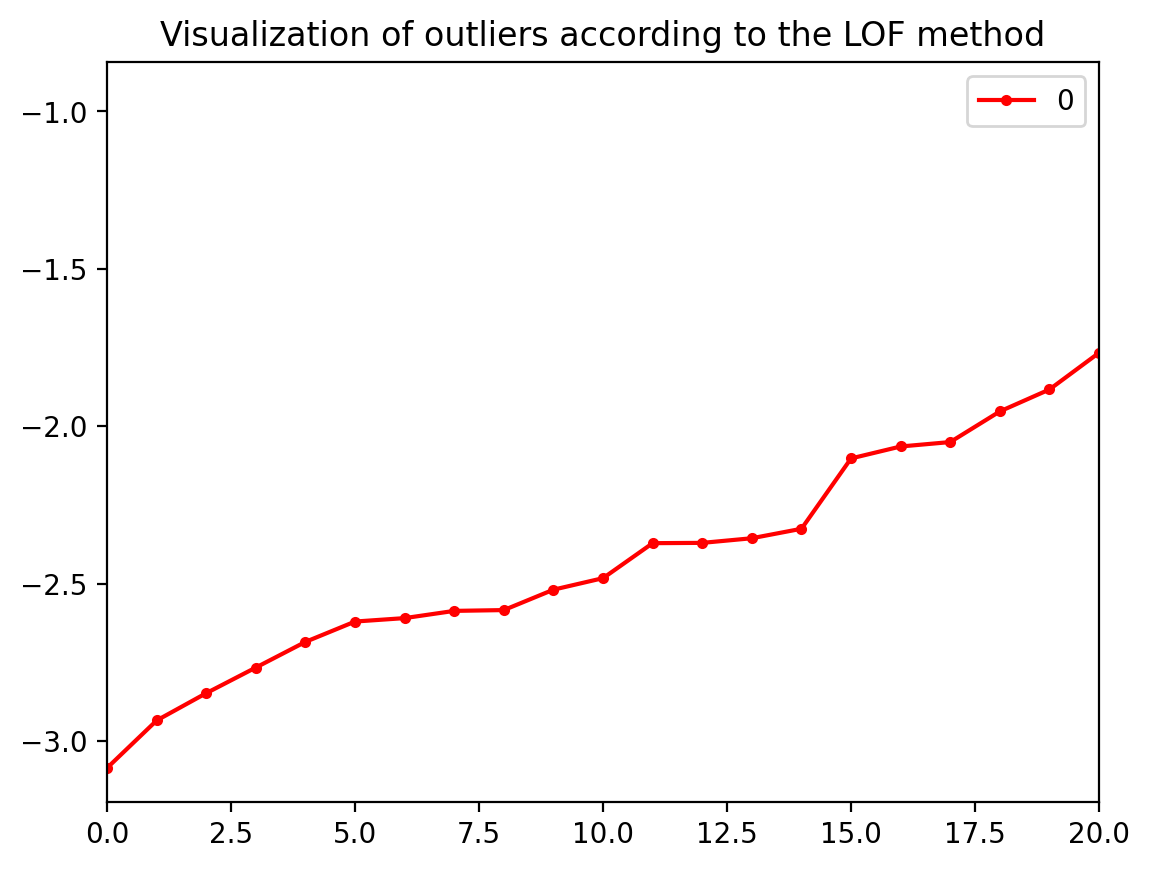

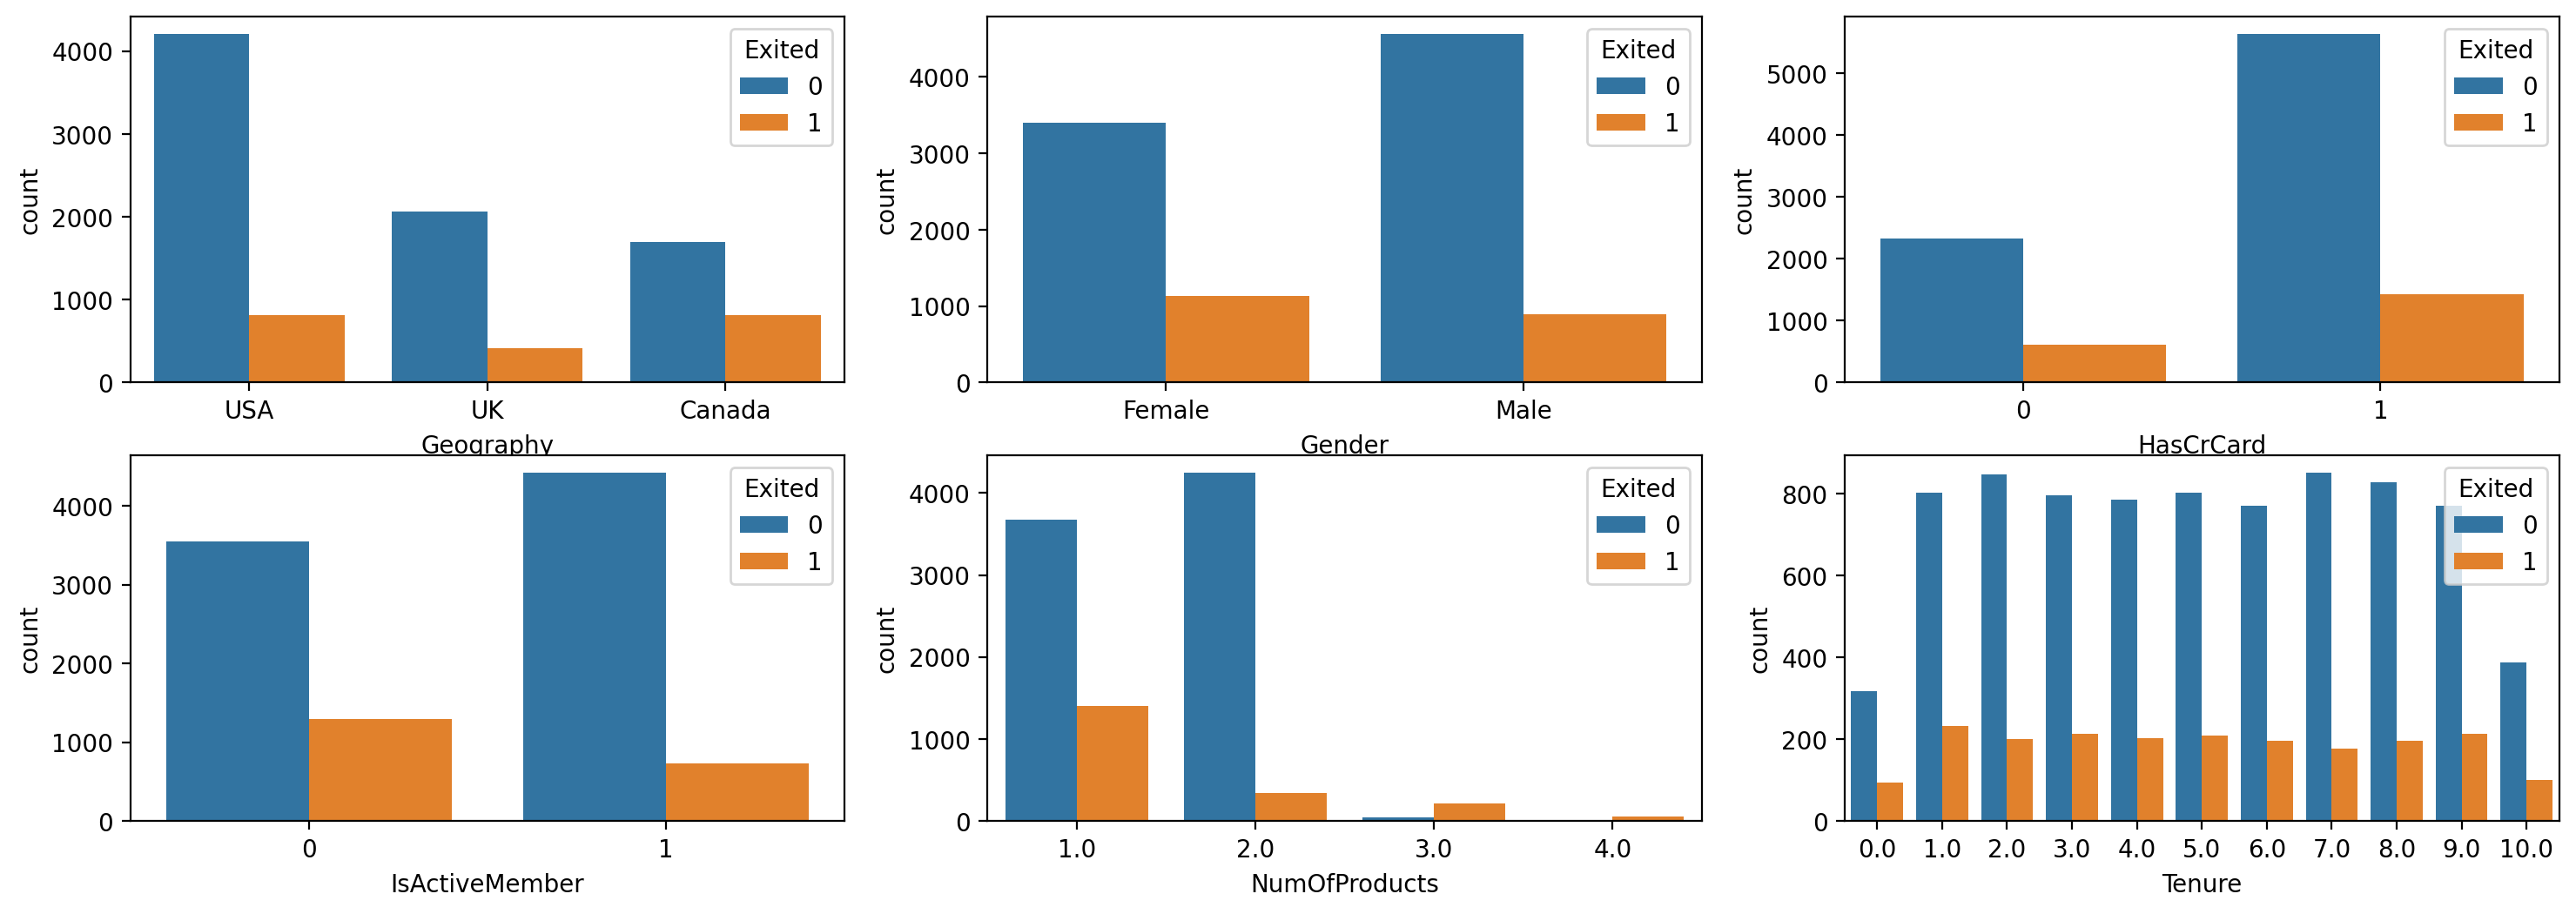

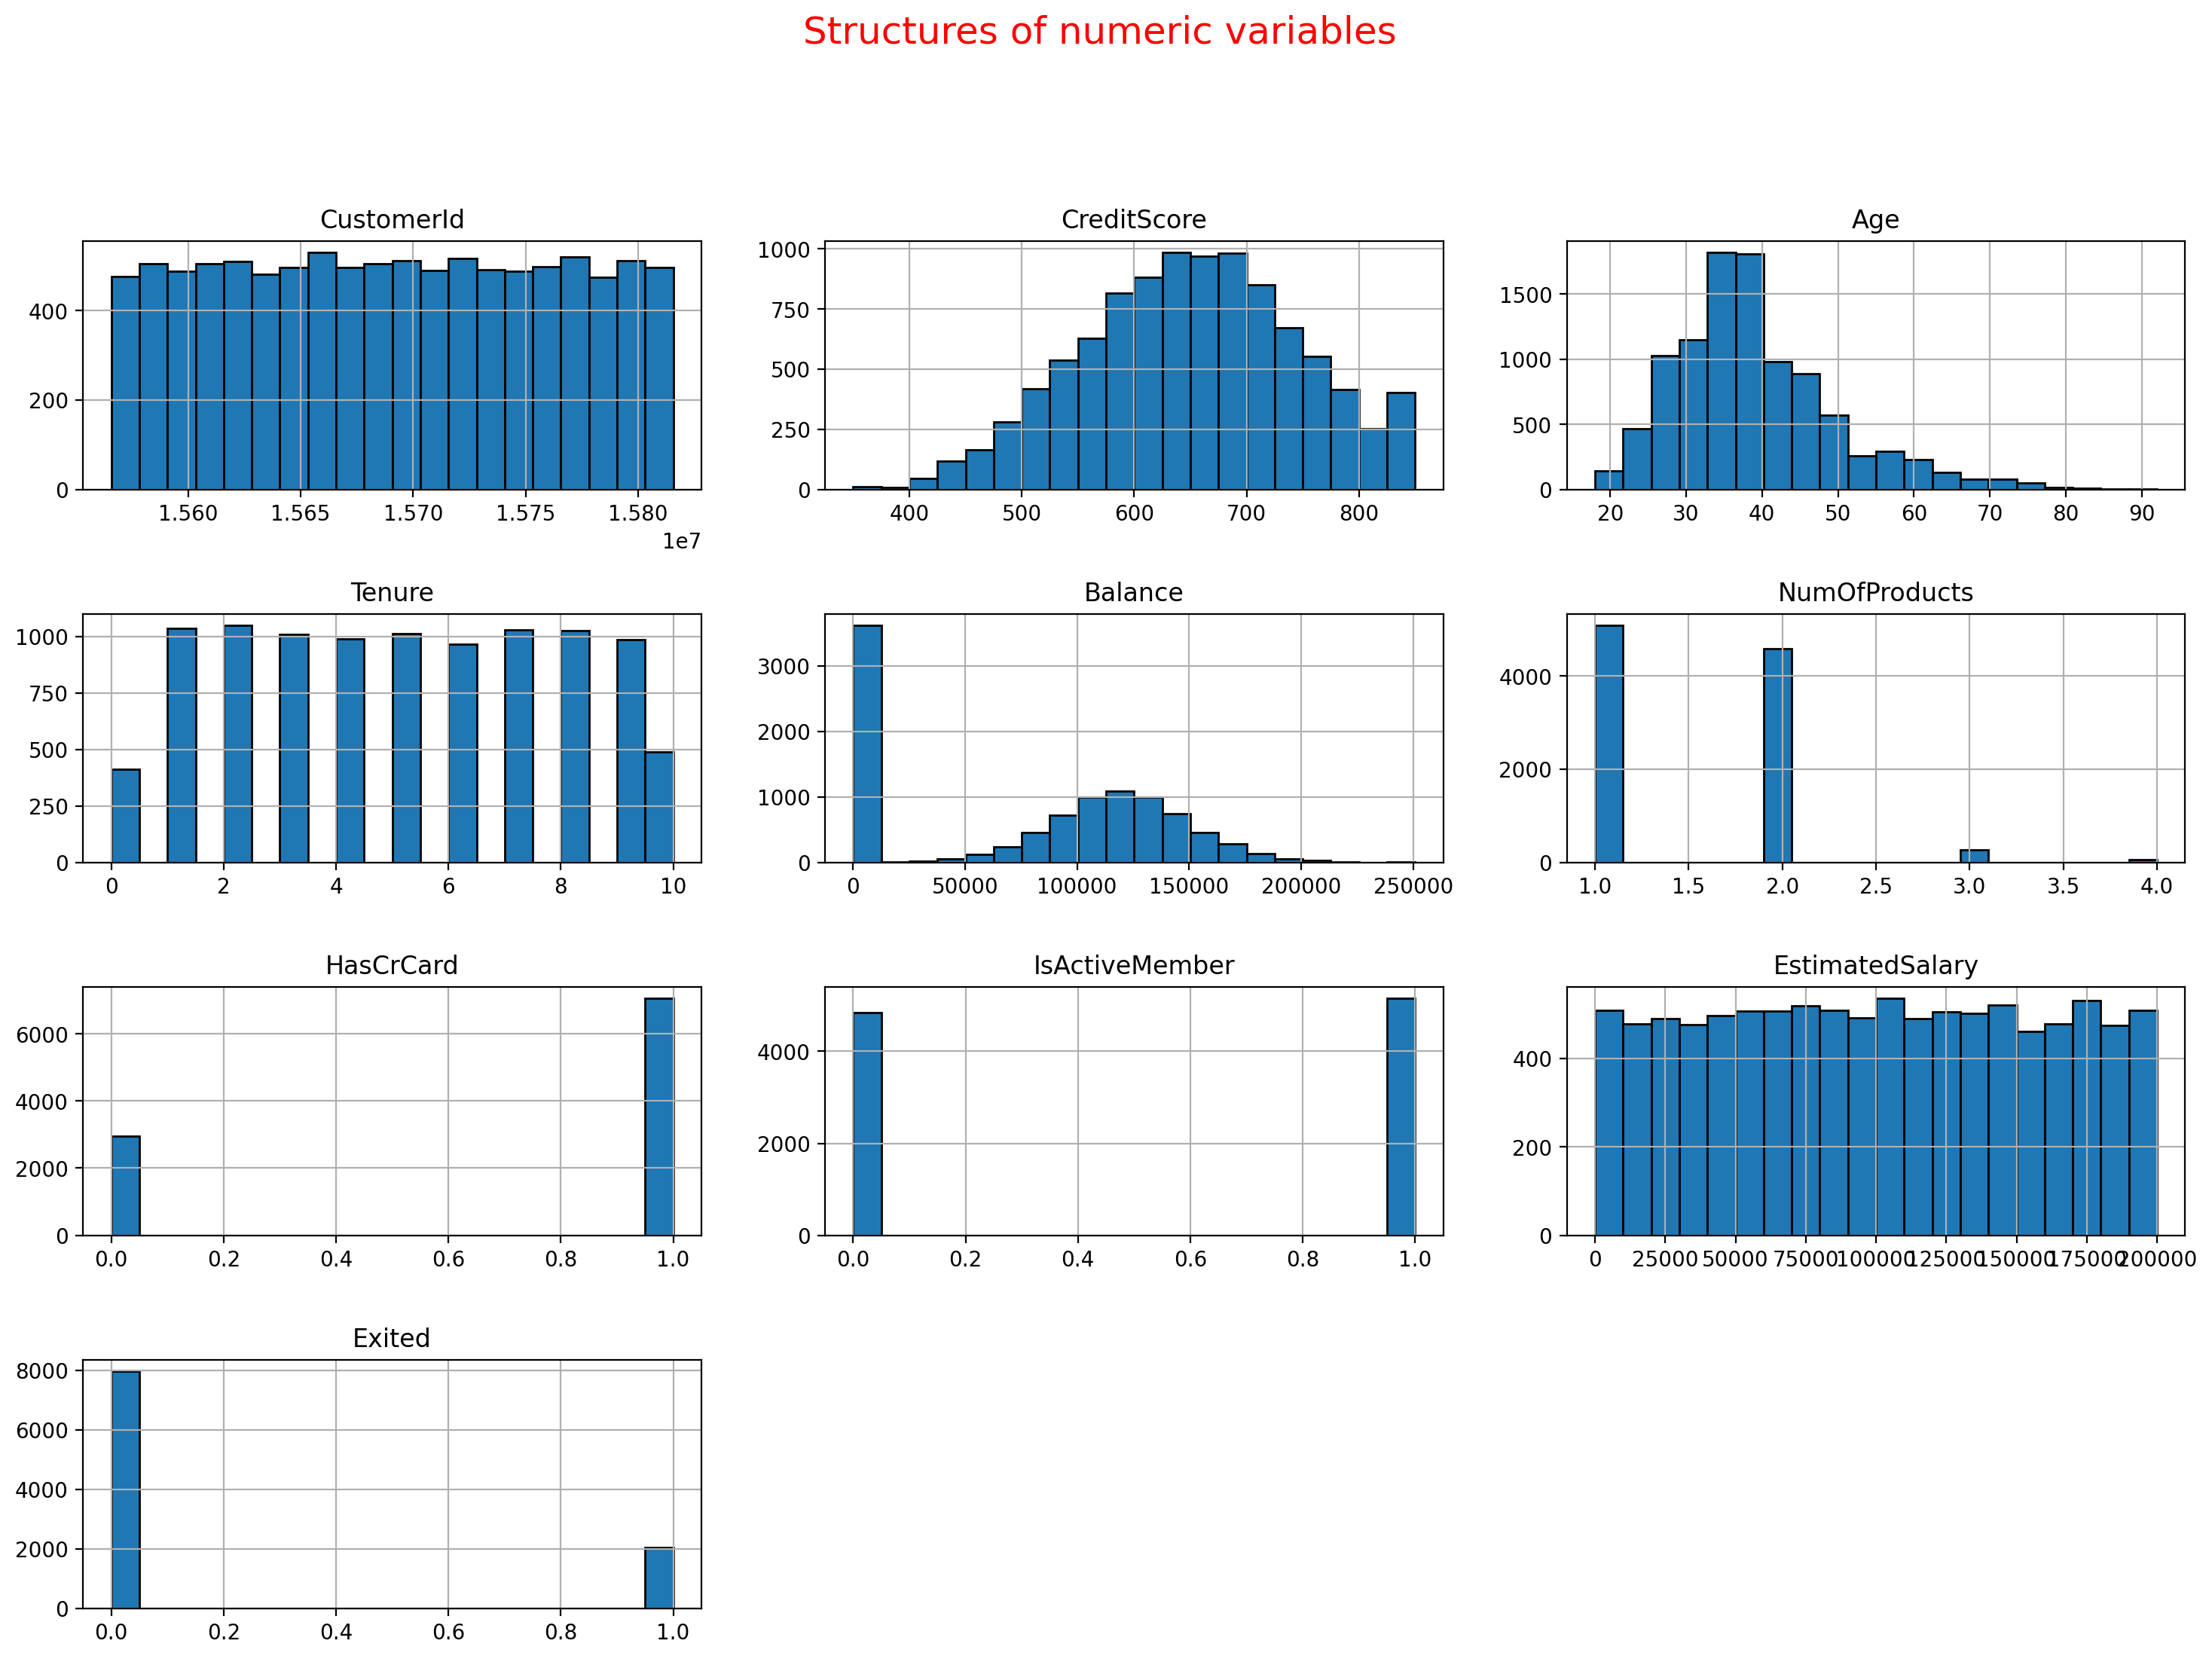

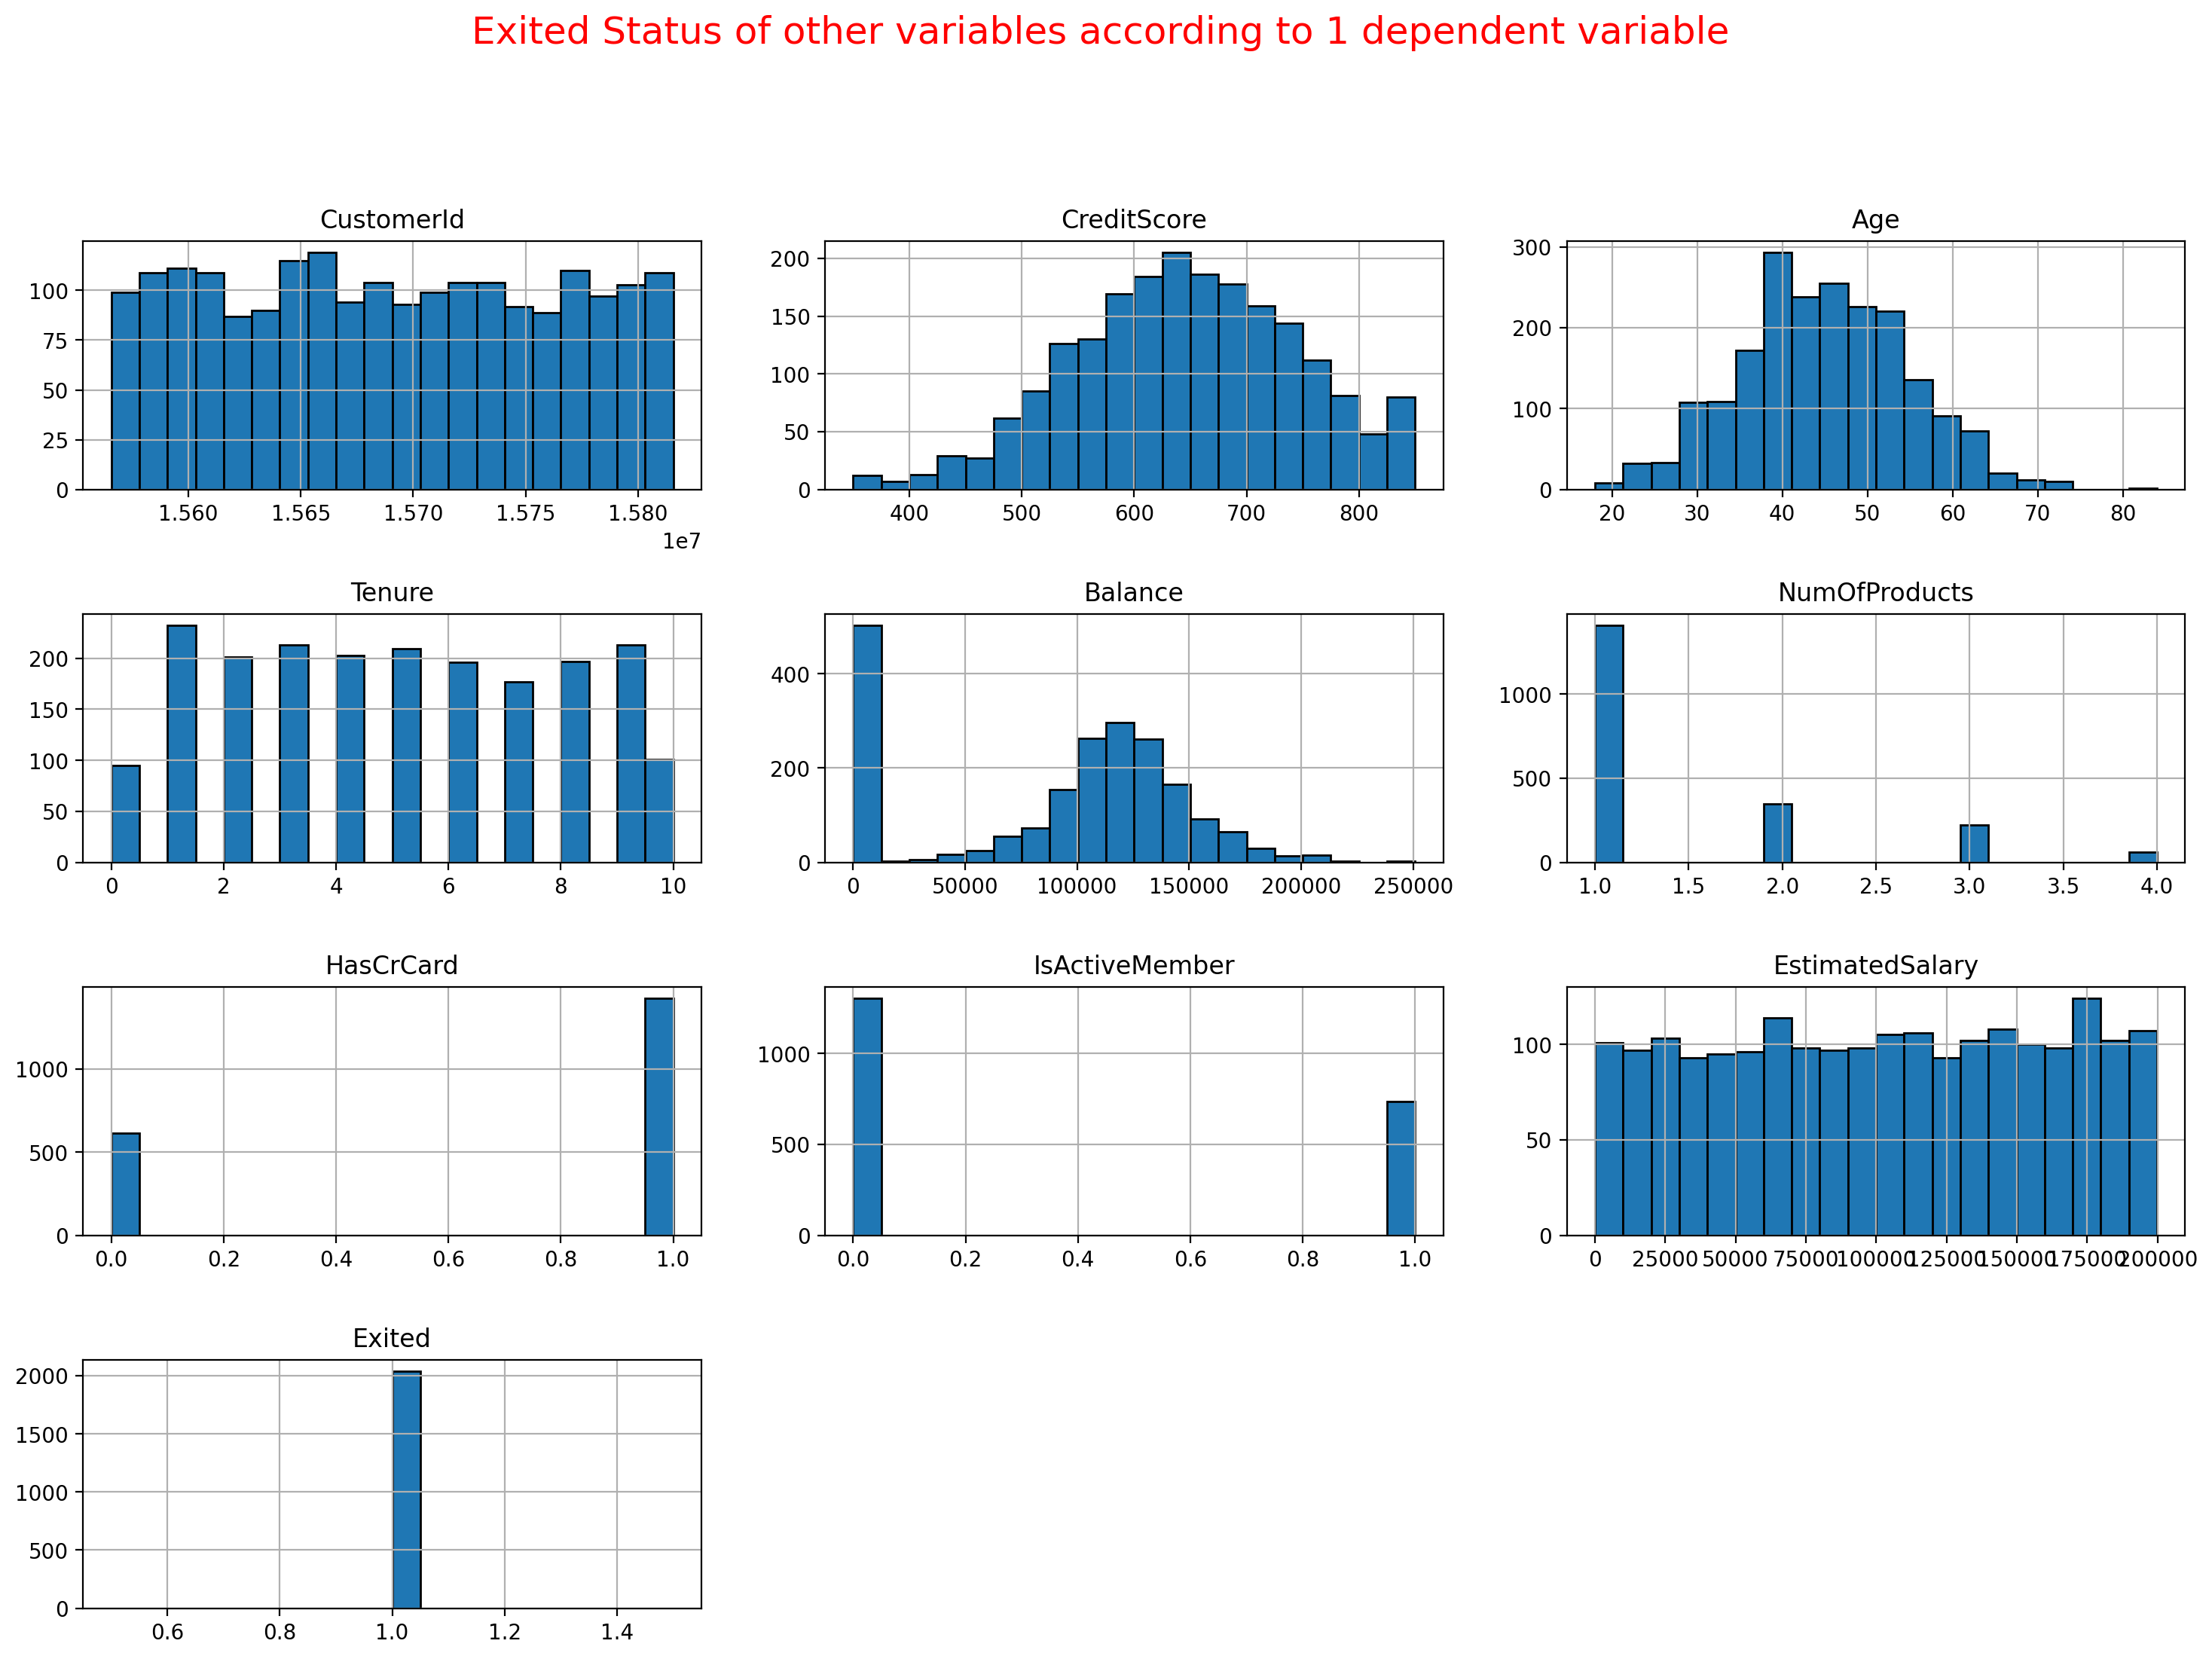

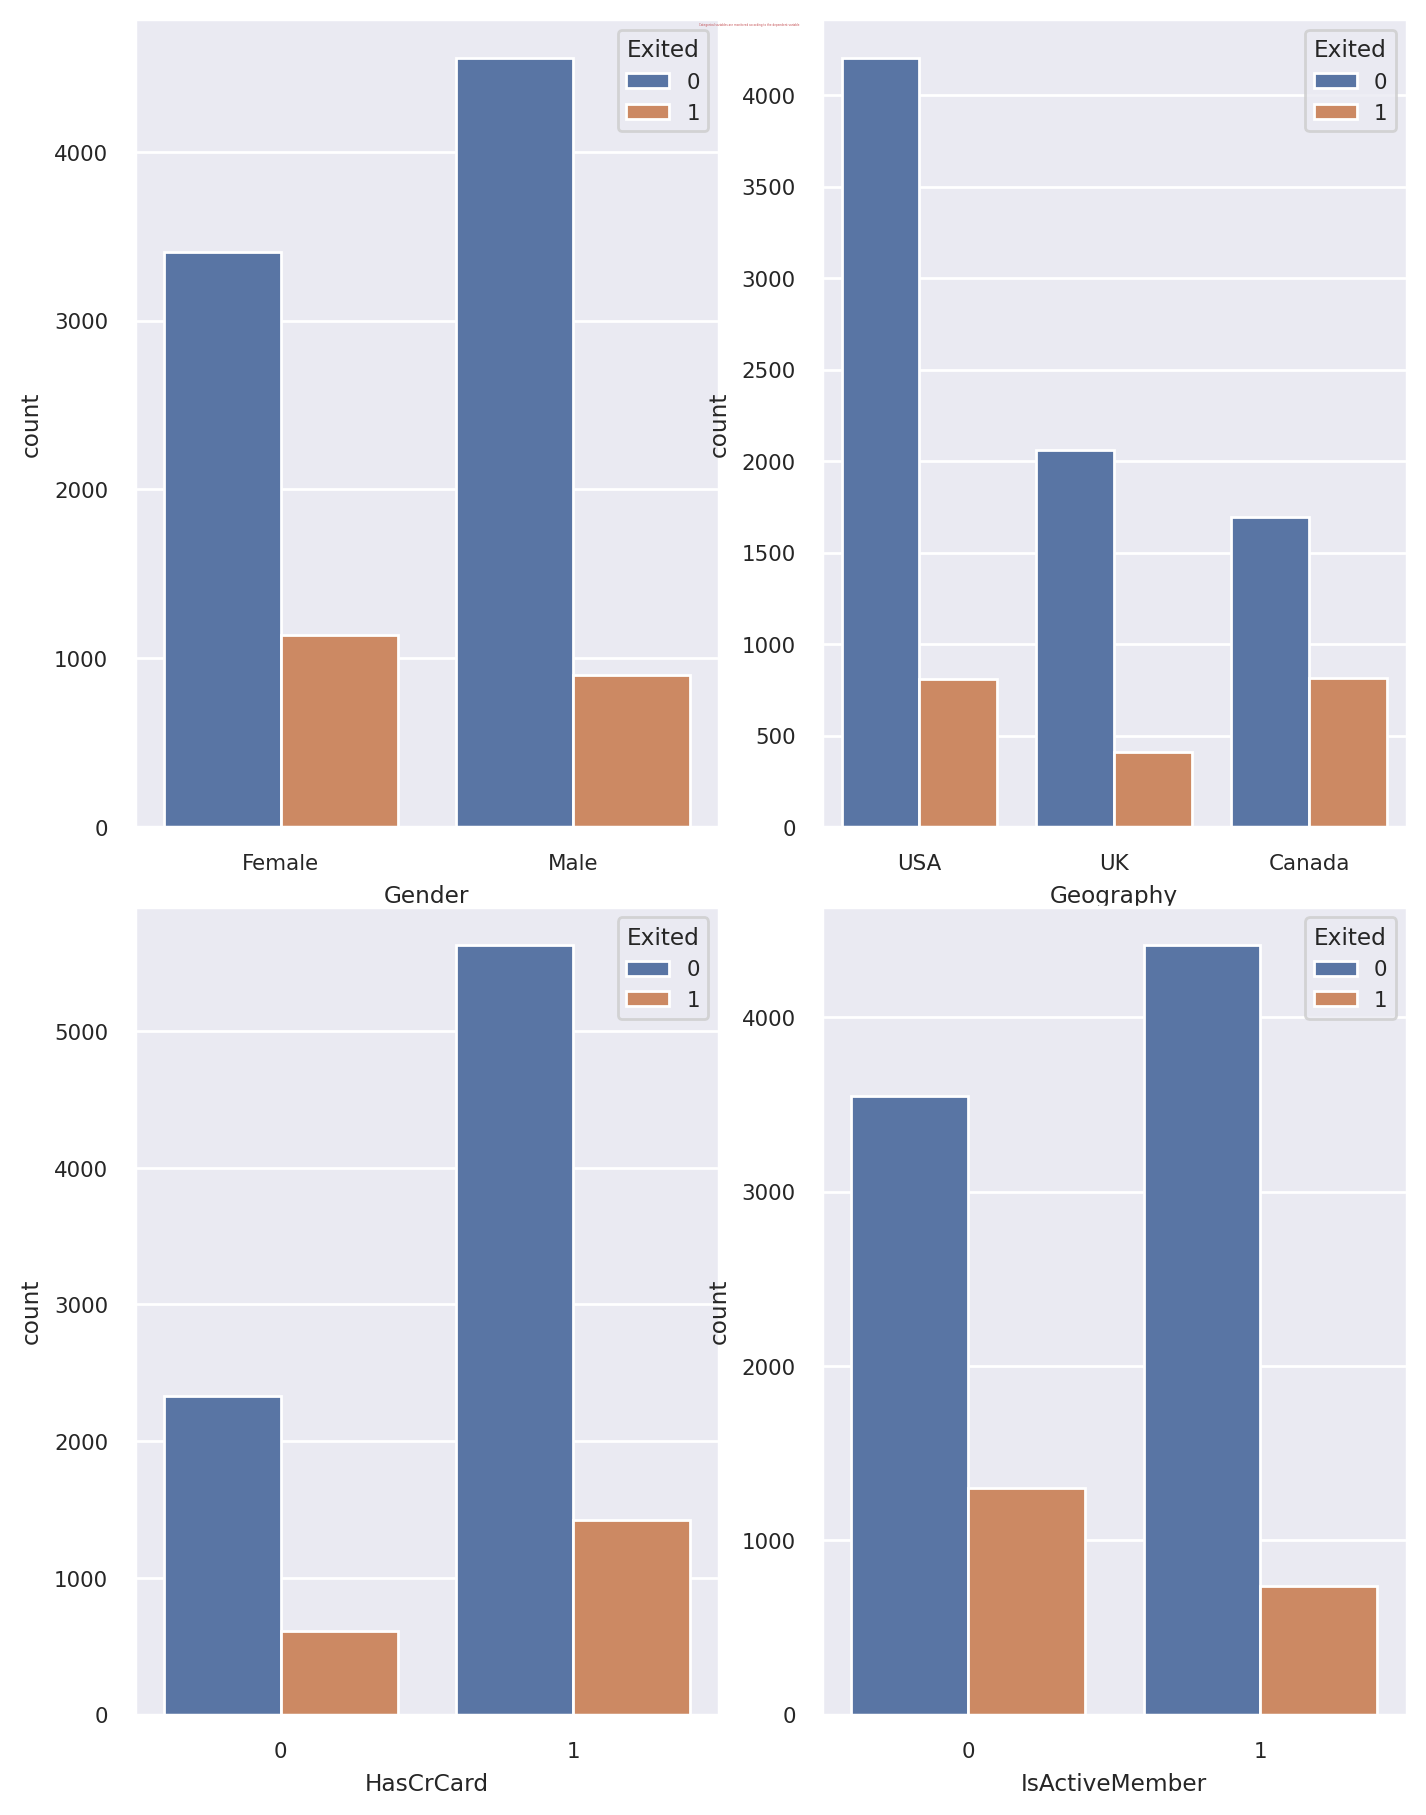

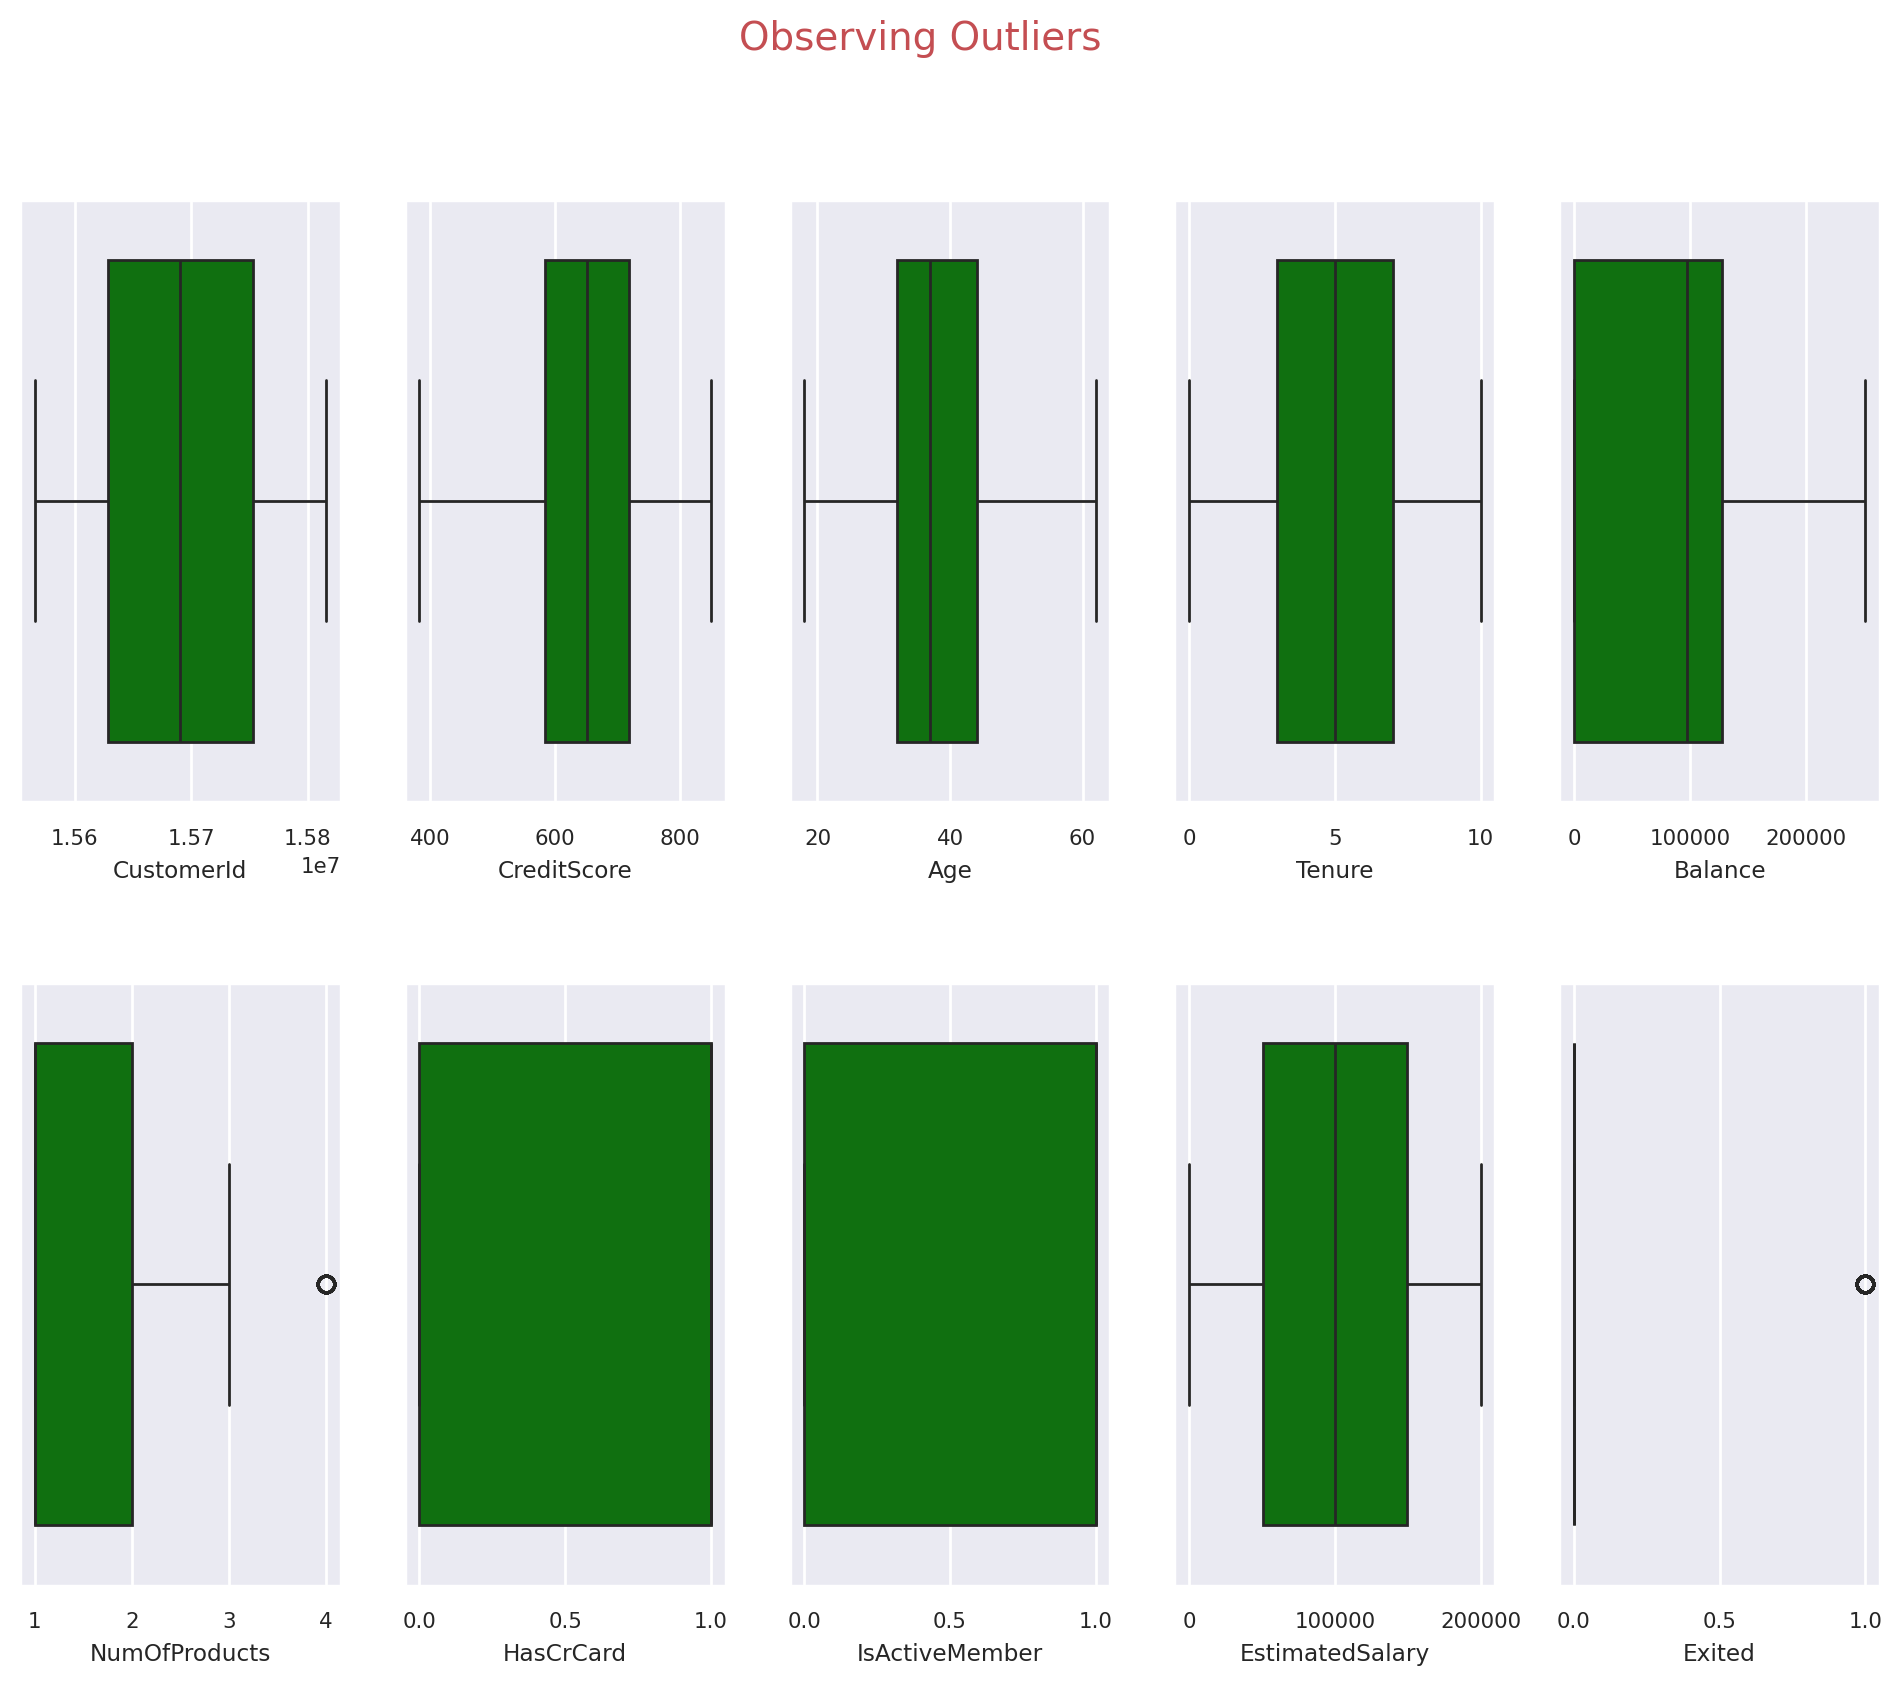

In [ ]:
# data cleaning
df_prep = data_prepare()

df_outlier = outlier_process(df = df_prep)


show_data_analysis(df_prep)
show_outliers(df = df_outlier)

In [ ]:
# after feature engineering
df_fe = feature_engineering(df = df_outlier)
df_fe.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_salary_rate,product_utilization_rate_by_year,tenure_rate_by_age,credit_score_rate_by_age,credit_score_rate_by_salary,credit_score_table,countries_monthly_average_salaries
0,15634602,Hargrave,619,USA,Female,42,2.00,0.00,1.00,1,1,101348.88,1,0.00,0.50,0.08,24.76,0.01,Fair,1.31
1,15647311,Hill,608,UK,Female,41,1.00,83807.86,1.00,0,1,112542.58,0,0.74,1.00,0.04,25.33,0.01,Fair,2.24
2,15619304,Onio,502,USA,Female,42,8.00,159660.80,3.00,1,0,113931.57,1,1.40,0.38,0.32,20.08,0.00,Poor,1.47


In [ ]:
# after data encoding
df_encoded = data_encoding(df_fe)
df_encoded.drop(['credit_card_situation', 'is_active_member'], axis=1, inplace=True)
df_encoded.head(3)

,Age,Balance,Exited,balance_salary_rate,product_utilization_rate_by_year,tenure_rate_by_age,credit_score_rate_by_age,credit_score_rate_by_salary,countries_monthly_average_salaries,HasCrCard,IsActiveMember,NumOfProducts,Tenure,gender_category,country_category,credit_score_category
0,42,0.00,1,0.00,0.50,0.08,24.76,0.01,1.31,1,1,1.00,2.00,0,2,1
1,41,83807.86,0,0.74,1.00,0.04,25.33,0.01,2.24,0,1,1.00,1.00,0,1,1
2,42,159660.80,1,1.40,0.38,0.32,20.08,0.00,1.47,1,0,3.00,8.00,0,2,3


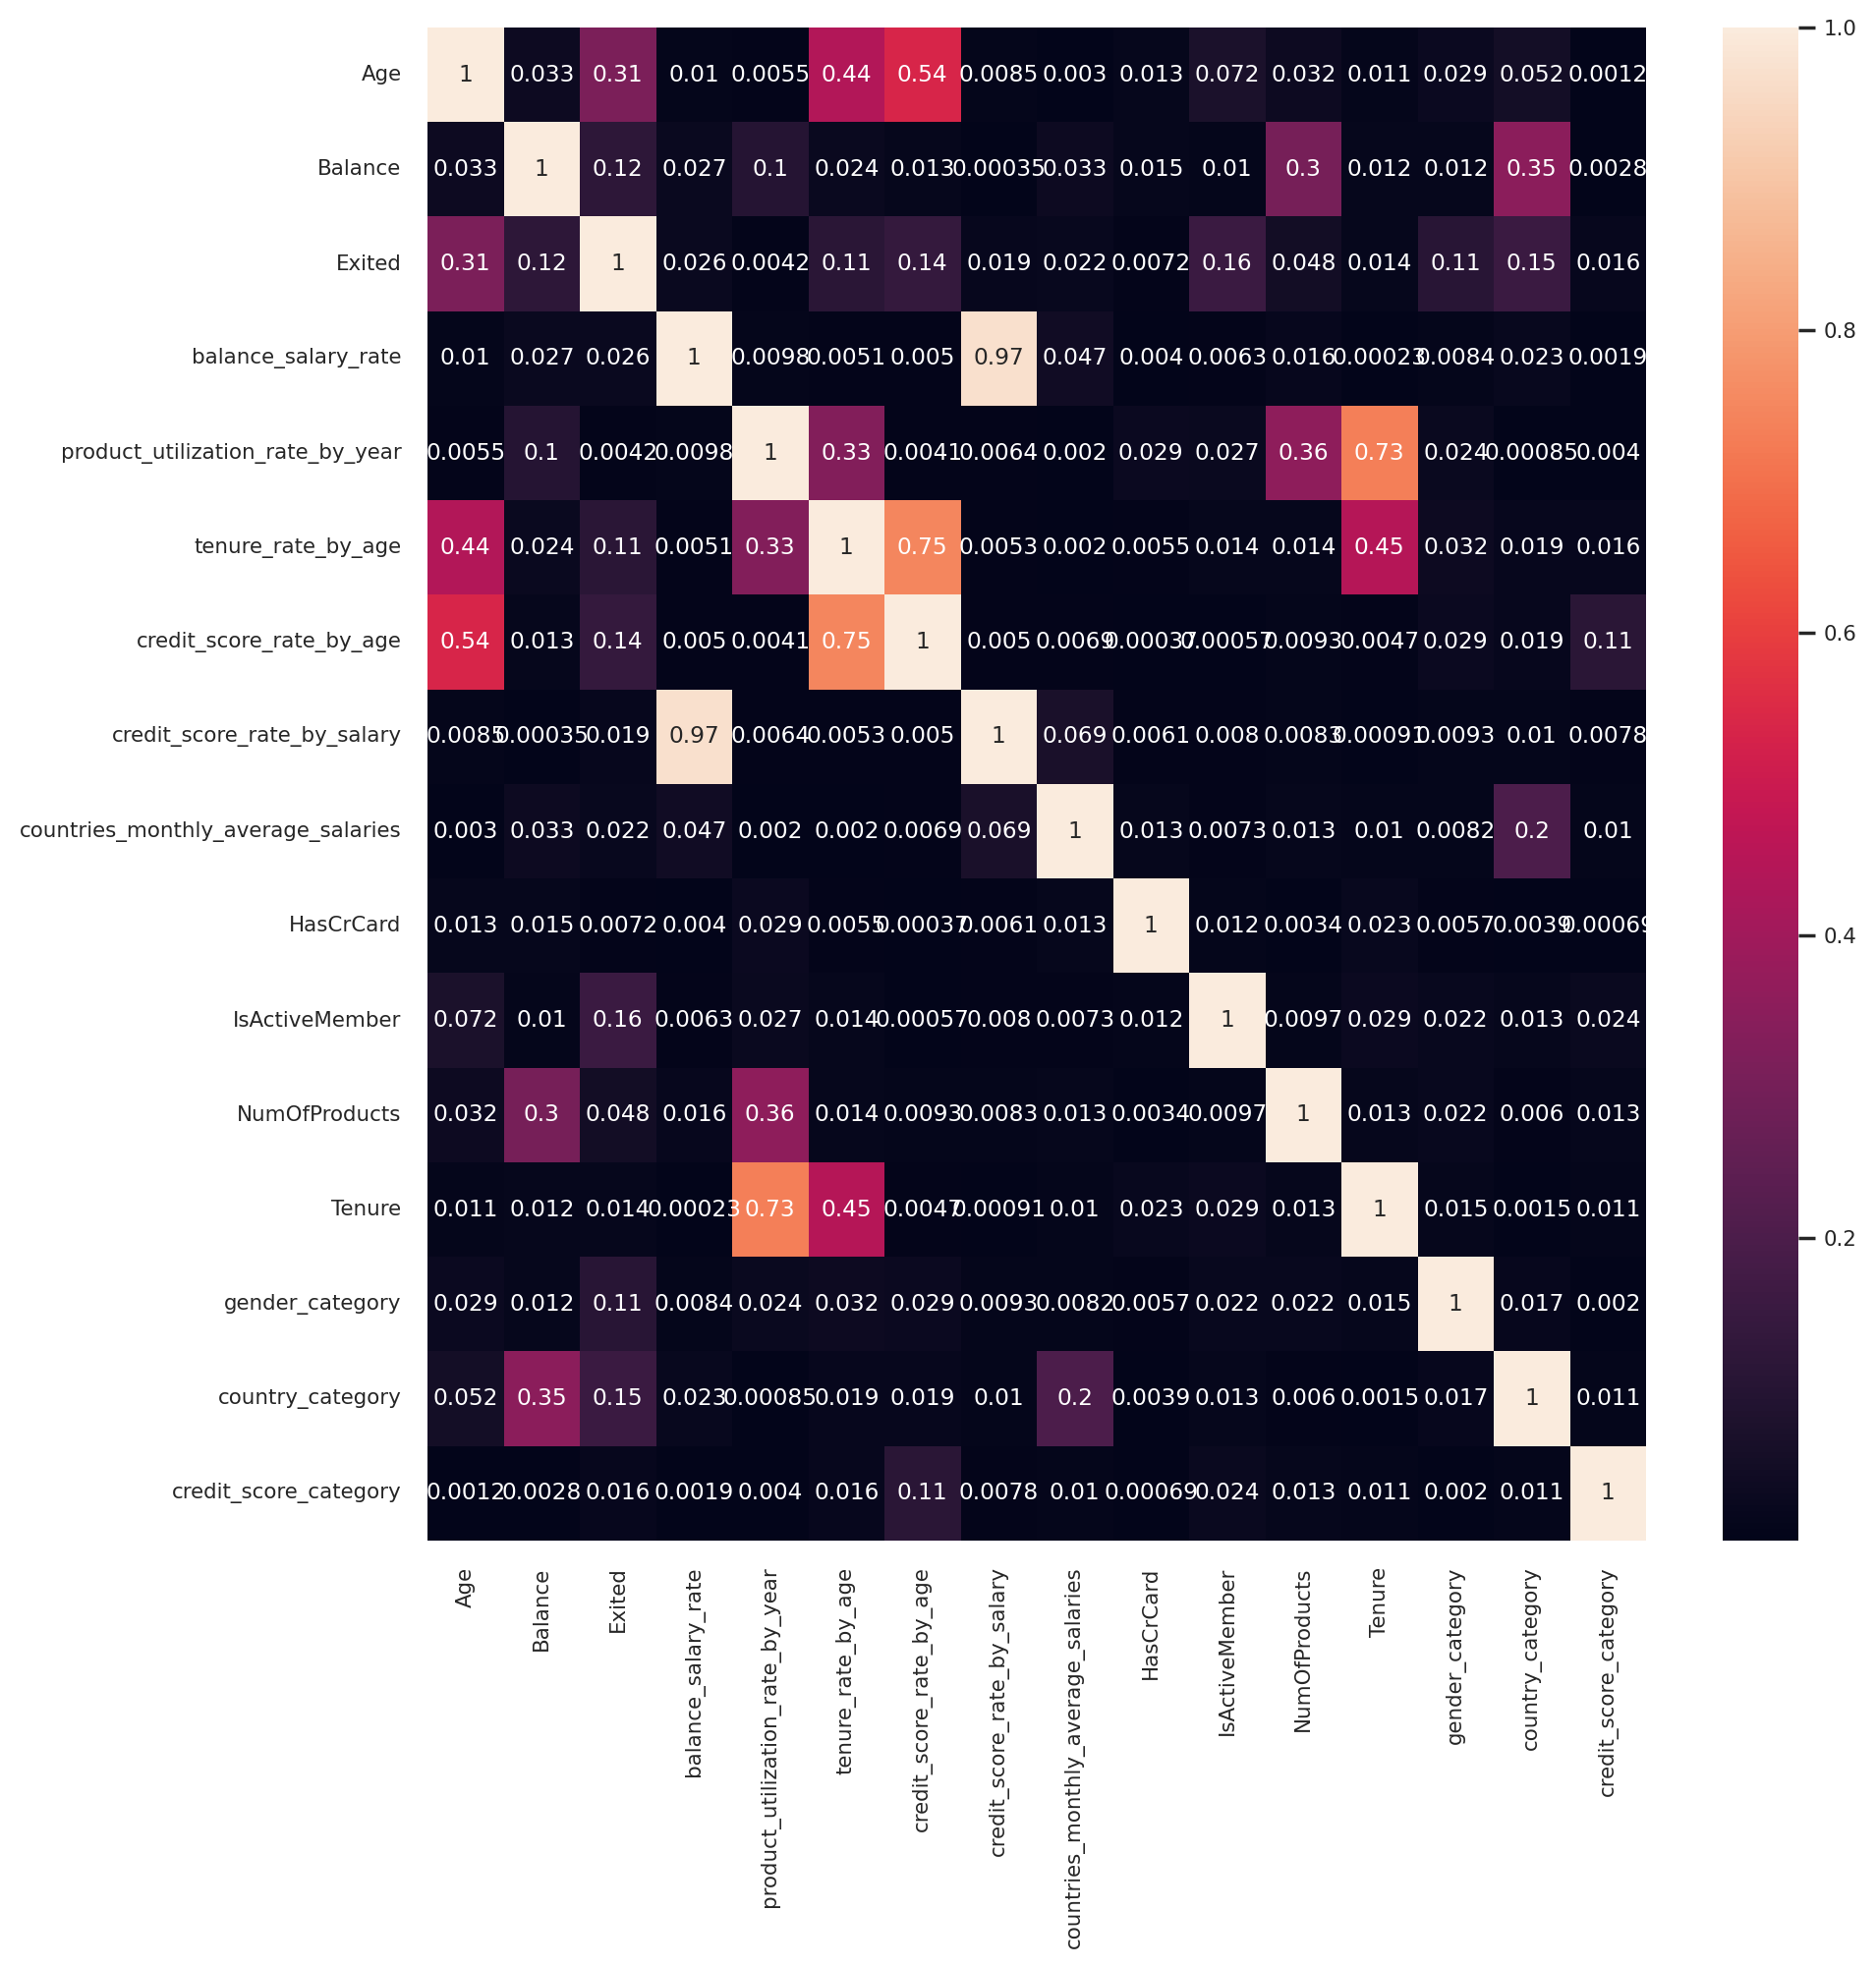

In [ ]:
# heat map
correlation = df_encoded.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
corrs_results = df_encoded.corrwith(df_encoded["Exited"]).abs().nlargest(24)
corrs_results

,0
Exited,1.00
Age,0.31
IsActiveMember,0.16
country_category,0.15
credit_score_rate_by_age,0.14
Balance,0.12
tenure_rate_by_age,0.11
gender_category,0.11
NumOfProducts,0.05
balance_salary_rate,0.03


In [ ]:
# apply model
# model_prepare test, train split 0.2
X_train, X_test, y_train, y_test = model_prepare(df_model = df_encoded)

In [ ]:
# logistic regression model
logr_model = LogisticRegression().fit(X_train,y_train)
y_pred = logr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=4))
print("Accuracy score of Logistic Regression: ", accuracy)

              precision    recall  f1-score   support

           0     0.8247    0.9717    0.8922      1588
           1     0.6512    0.2039    0.3105       412

    accuracy                         0.8135      2000
   macro avg     0.7379    0.5878    0.6014      2000
weighted avg     0.7889    0.8135    0.7723      2000

Accuracy score of Logistic Regression:  0.8135


In [ ]:
# model training for logisticRegression, randomForestClassifier, gradientBoostingClassifier, XGBClassifier, and LGBMClassifier
training_result = data_training(X_train, X_test, y_train, y_test)
training_result

[LightGBM] [Info] Number of positive: 1624, number of negative: 6373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1622
[LightGBM] [Info] Number of data points in the train set: 7997, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203076 -> initscore=-1.367178
[LightGBM] [Info] Start training from score -1.367178
Learning rate set to 0.025031
0:	learn: 0.6720079	total: 52.2ms	remaining: 52.1s
1:	learn: 0.6524531	total: 56.3ms	remaining: 28.1s
2:	learn: 0.6343770	total: 62ms	remaining: 20.6s
3:	learn: 0.6204175	total: 66.2ms	remaining: 16.5s
4:	learn: 0.6059686	total: 70.6ms	remaining: 14s
5:	learn: 0.5914207	total: 74.8ms	remaining: 12.4s
6:	learn: 0.5768878	total: 78.7ms	remaining: 11.2s
7:	learn: 0.5633107	total: 83ms	remaining: 10.3s
8:	learn: 0.5

,model,accuracy_score,scale_method,0_precision,0_recall,1_precision,1_recall
7,CatBoost,0.86,NA,0.88,0.96,0.76,0.49
4,GBM,0.86,NA,0.87,0.96,0.77,0.47
6,LightGBM,0.86,NA,0.88,0.96,0.75,0.47
3,RF,0.86,NA,0.87,0.96,0.76,0.45
5,XGBoost,0.86,NA,0.88,0.95,0.72,0.50
1,KNN,0.84,NA,0.86,0.95,0.68,0.38
0,LOGR,0.81,NA,0.82,0.97,0.65,0.20
2,CART,0.79,NA,0.87,0.87,0.49,0.49


In [ ]:
# XGBoost Tuning
xgb_model=XGBClassifier(silent=0, learning_rate=0.23, max_delta_step=5,
                            objective='reg:logistic',n_estimators=92,
                            max_depth=5, eval_metric="logloss", gamma=3,base_score=0.5)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test,y_pred,digits=2))
print("Accuracy score of Tuned XGBoost Regression: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1588
           1       0.78      0.48      0.59       412

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy score of Tuned XGBoost Regression:  0.8655


In [ ]:
# Random Forest tuning
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators' : [50,100], 'min_samples_split': [3, 5, 6, 7]}
randFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, refit = True, verbose = 0)
randFor_grid.fit(X_train,y_train)
best_model(randFor_grid)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.8632009068167605
{'max_depth': 8, 'max_features': 6, 'min_samples_split': 6, 'n_estimators': 100}
RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=6)


In [ ]:
rnd_model = RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=6,n_estimators=50)
rnd_model.fit(X_train, y_train)
y_pred = rnd_model.predict(X_test)
print(classification_report(y_test,y_pred,digits=2))
print("Accuracy score of tuned Random Forest model: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1588
           1       0.80      0.45      0.58       412

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

Accuracy score of tuned Random Forest model:  0.8645


In [ ]:
#lightGBM tuning
lgbm_model = LGBMClassifier(silent = 0, learning_rate = 0.09, max_delta_step = 2, n_estimators = 100, boosting_type = 'gbdt',
                            max_depth = 10, eval_metric = "logloss", gamma = 3, base_score = 0.5)
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))
print("Accuracy score of tuned LightGBM model: ", accuracy_score(y_test, y_pred))

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: base_score
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: base_score
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 1624, number of negative: 6373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1622
[LightGBM] [Info] Number of data points in the train set: 7997, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203076 -> initscore=-1.367178
[LightGBM] [Info] Start training from score -1.367178
[LightGBM] [Warning] Unknown parameter: eval_metric
[

Confusion matrix, without normalization
[[1528   60]
 [ 208  204]]
True Negatives:  1528
False Positives:  60
False Negatives:  208
True Positives:  204


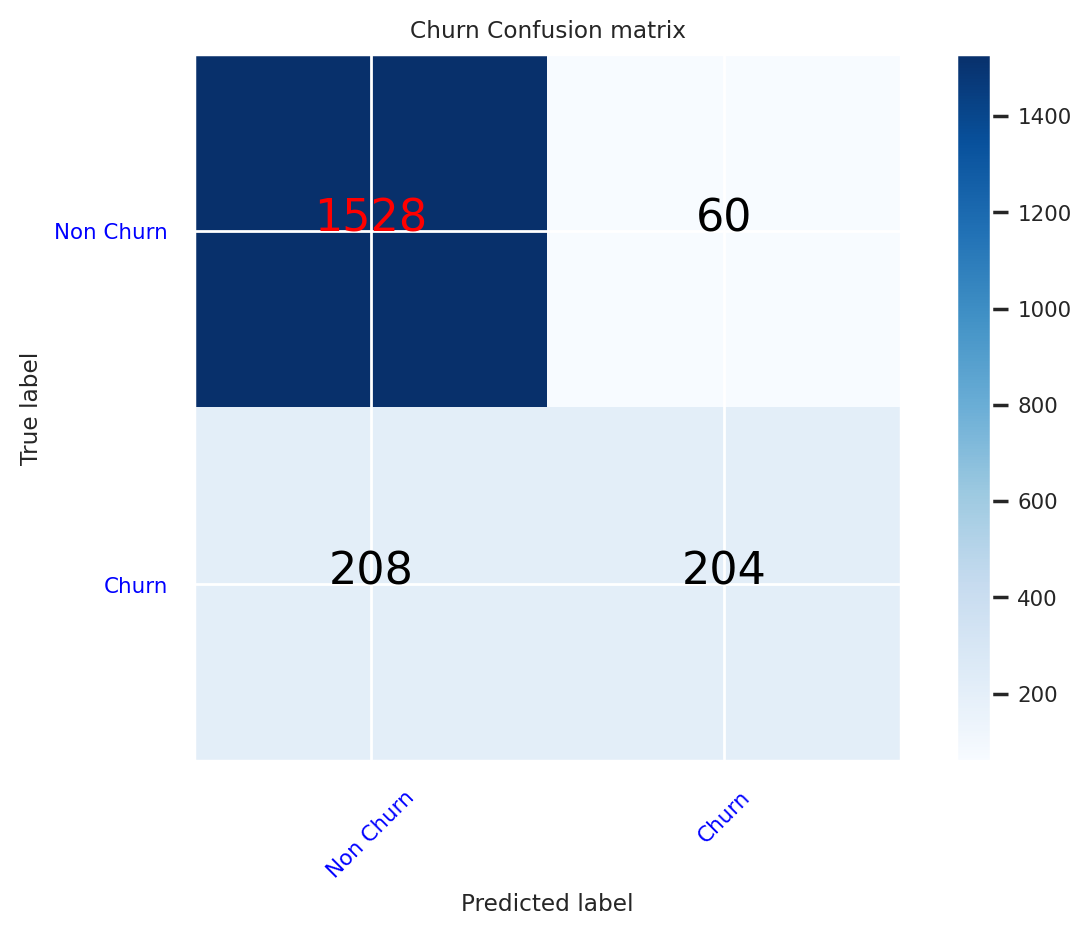

In [ ]:
#confusion matrix
cfm = confusion_matrix(y_test, y_pred=y_pred)
plot_confusion_matrix(cfm, classes=['Non Churn','Churn'],
                      title='Churn Confusion matrix')


tn, fp, fn, tp = cfm.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: base_score
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: silent


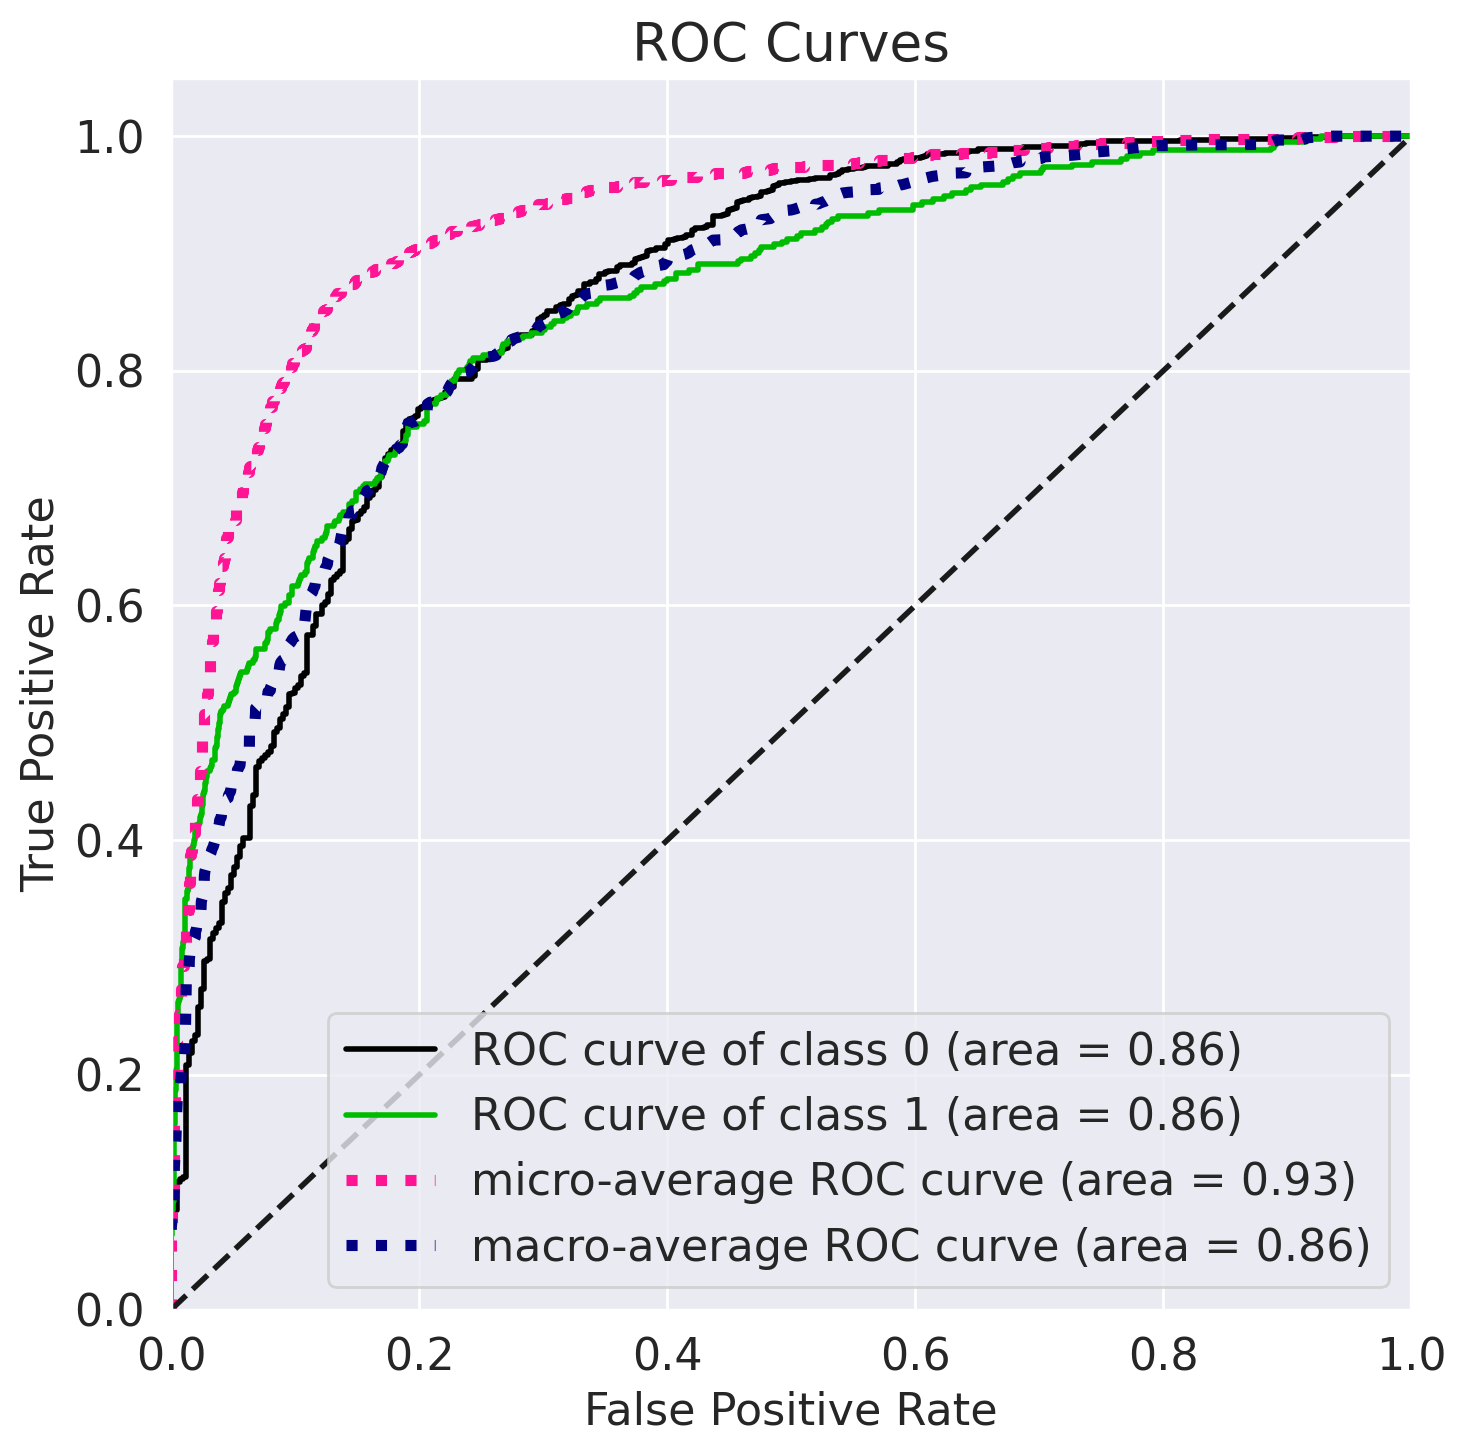

In [ ]:
#roc curve

!pip install scikit-plot
import scikitplot as skplt
y_pred_proba = lgbm_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba, figsize=(8,8))

plt.show()

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: base_score
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: silent


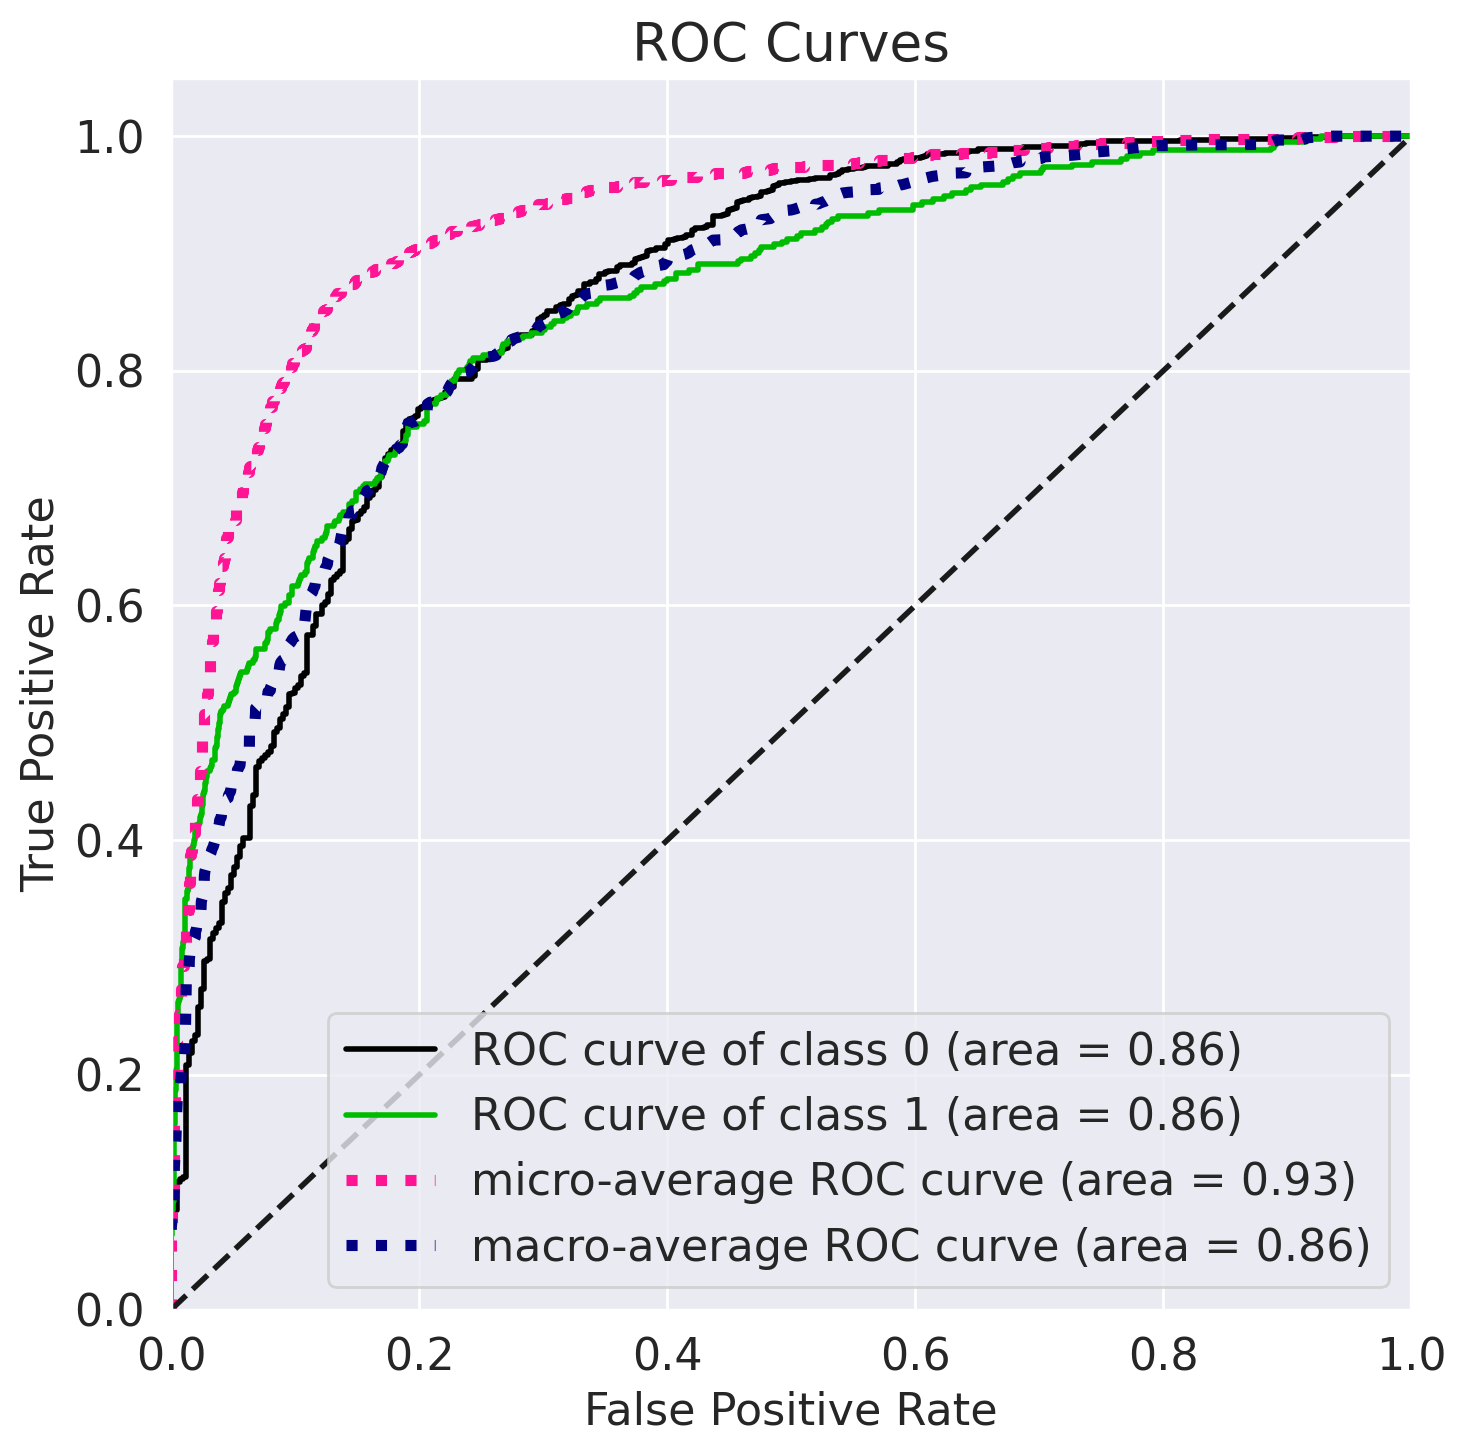

In [ ]:
!pip install scikit-plot -U --no-deps
!pip install scipy==1.9.3

import scikitplot as skplt
import matplotlib.pyplot as plt #make sure you import this
y_pred_proba = lgbm_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba, figsize=(8,8))

plt.show()

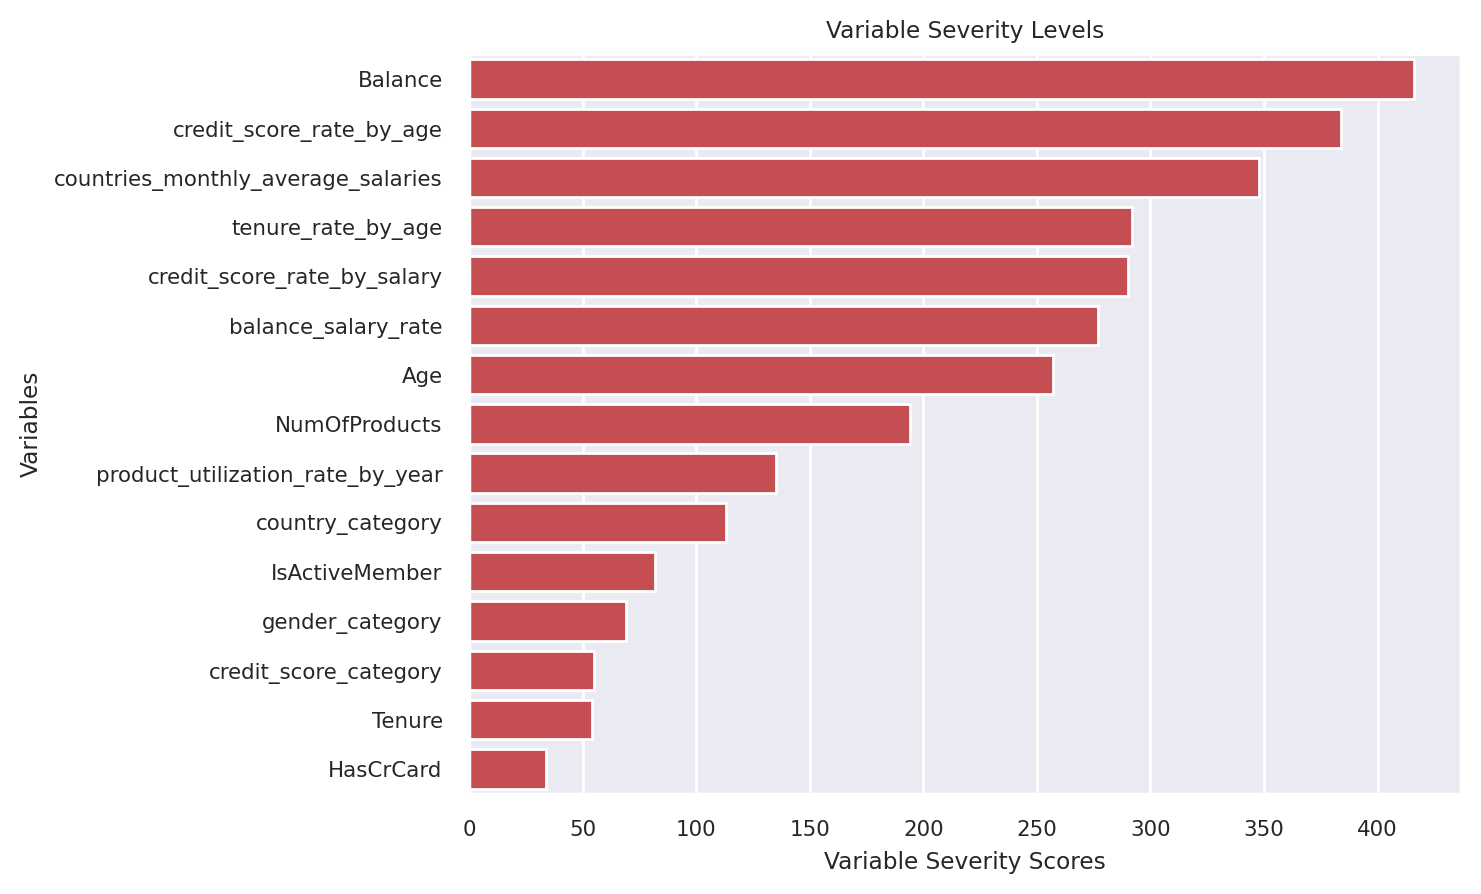

In [ ]:
feature_index = df_encoded.loc[:, df_encoded.columns != dependent_variable_name]

feature_importance = pd.Series(lgbm_model.feature_importances_,
                               index=feature_index.columns).sort_values(ascending=False)
sns.barplot(x = feature_importance, y = feature_importance.index, color='r', saturation=1)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title('Variable Severity Levels')
plt.show()